In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("../code/")

%matplotlib inline

In [2]:
import pickle
H_au = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/case-2-graph_Austin_True_1_13_Hs.pkl'), 'r'))

In [3]:
H_sd = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0.pkl'), 'r'))
H_error_home = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error_home.pkl'), 'r'))
H_error = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error.pkl'), 'r'))
H_params = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_params.pkl'), 'r'))
H_error_app = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error_home_app.pkl'), 'r'))

In [10]:
best_show = [
    [2, 1300, 2, 3, 0.001]
]

from plot_functions import latexify, format_axes

9.64394298538


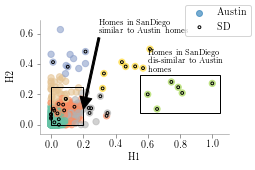

In [65]:
latexify()
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.patches as patches
import matplotlib.lines as mlines
for i in range(len(best_show)):
    # for i in range(1):
        lr, iters, season, home, lam = best_show[i]
    #     print H_params[i]
        
        H_sandiego = H_sd[lr][iters][season][home][lam]
        H_austin = H_au[lr][season][home][lam][iters]
        
        H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
        H_sandiego = H_sandiego.values
        
        ### NIPUN ###
        """
        H_sandiego = H_sandiego/np.max(H_sandiego)
        H_austin = H_austin/np.max(H_austin)
        """
        
        
        X = np.r_[H_austin, H_sandiego]
        print np.max(X)
        X = X/np.max(X)
        y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
        x1, x2 = (-np.var(X, axis=0)).argsort()[:2]
        
        y_sd = np.zeros(len(H_sandiego))
        y_au = np.ones(len(H_austin))
        y_label = np.r_[y_au, y_sd]
        
        home_error = H_error_home[lr][iters][season][home][lam]
        home_error = np.around(home_error.values)    
        
        
        start = len(H_austin)
        d = np.random.randint(0, 2, size=(3,3,3))
        z,x,y = d.nonzero()
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(111)
    #     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
        ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2',alpha=0.6, s=40)
        
        ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none', s=8)
    #     ax.set_color('yellow', 'red')
        # ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)
        
        max_idx = (-home_error).argsort()[:10]
        min_idx = (home_error).argsort()[:5]
        
        #for j in max_idx:
        #    ax.annotate(int(home_error[j]), (X[j+start, x1],X[j+start, x2]))
        #for j in min_idx:
        #    ax.annotate(int(home_error[j]), (X[j+start, x1],X[j+start, x2]), color='red')
            
#         line1, = ax.scatter([], [], marker='o', label='Austin', colormap='Set2')
#         line2, = plt.plot([], marker='o', label='SanDiego')

#         blue_line = mlines.Line2D([], [], color='blue', marker='*',
#                           markersize=15, label='Blue stars')
#         plt.legend(handles=[blue_line])
#         plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
        format_axes(ax)
        ax.set_xlabel("H1")
        ax.set_ylabel("H2")
        ax.add_patch(
            patches.Rectangle(
                (0.55, 0.08),
                0.5,
                0.25,
                fill=False      # remove background
            )
        )
        ax.text(0.6, 0.35, "Homes in SanDiego\n dis-similar to Austin \nhomes", fontsize=8)
        
        ax.add_patch(
            patches.Rectangle(
                (0.0, 0.0),
                0.2,
                0.25,
                fill=False      # remove background
            )
        )
        ax.annotate('Homes in SanDiego\n similar to Austin homes', xy=(0.2, 0.1), xytext=(0.3, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.005, width=2), fontsize=8
            )
        #ax.text(0.1, 0.6, "Homes in SanDiego\n similar to Austin homes", fontsize=8)
        
        marker1 = plt.scatter([],[], alpha=0.6)
        marker2 = plt.scatter([],[],color='black', marker='o', facecolors='none', s=8)
        legend_markers = [marker1, marker2]

        labels = ["Austin","SD"
            ]

        fig.legend(handles=legend_markers, labels=labels, loc='upper right',
            scatterpoints=1)

        plt.savefig("../figures/HF-Aggregate.pdf",bbox_inches="tight")

9.64394298538


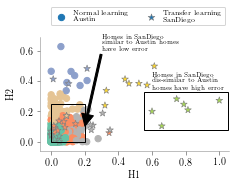

In [89]:
latexify()
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.patches as patches
import matplotlib.lines as mlines
for i in range(len(best_show)):
    # for i in range(1):
        lr, iters, season, home, lam = best_show[i]
    #     print H_params[i]
        
        H_sandiego = H_sd[lr][iters][season][home][lam]
        H_austin = H_au[lr][season][home][lam][iters]
        
        H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
        H_sandiego = H_sandiego.values
        
        ### NIPUN ###
        """
        H_sandiego = H_sandiego/np.max(H_sandiego)
        H_austin = H_austin/np.max(H_austin)
        """
        
        
        X = np.r_[H_austin, H_sandiego]
        print np.max(X)
        X = X/np.max(X)
        y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
        x1, x2 = (-np.var(X, axis=0)).argsort()[:2]
        
        y_sd = np.zeros(len(H_sandiego))
        y_au = np.ones(len(H_austin))
        y_label = np.r_[y_au, y_sd]
        
        home_error = H_error_home[lr][iters][season][home][lam]
        home_error = np.around(home_error.values)    
        
        
        start = len(H_austin)
        d = np.random.randint(0, 2, size=(3,3,3))
        z,x,y = d.nonzero()
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(111)
    #     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
        ax.scatter(X[:start, x1], X[:start, x2], c = y_pred[:start], cmap='Set2',alpha=1, s=40, marker='o',label='Normal learning\n Austin')
        ax.scatter(X[start:, x1], X[start:, x2], c = y_pred[start:], cmap='Set2',alpha=1, s=50, lw = 0.6,marker='*', edgecolors=['grey'],label="Transfer learning\nSanDiego")
        
        #ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none', s=8)
    #     ax.set_color('yellow', 'red')
        # ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)
        
        max_idx = (-home_error).argsort()[:10]
        min_idx = (home_error).argsort()[:5]
        
        
        format_axes(ax)
        ax.set_xlabel("H1")
        ax.set_ylabel("H2")
        ax.add_patch(
            patches.Rectangle(
                (0.55, 0.08),
                0.5,
                0.25,
                fill=False      # remove background
            )
        )
        ax.text(0.6, 0.35, "Homes in SanDiego\n dis-similar to Austin \nhomes have high error", fontsize=6)
        
        ax.add_patch(
            patches.Rectangle(
                (0.0, 0.0),
                0.2,
                0.25,
                fill=False      # remove background
            )
        )
        ax.annotate('Homes in SanDiego\n similar to Austin homes\nhave low error', xy=(0.2, 0.1), xytext=(0.3, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.005, width=2), fontsize=6
            )
        #ax.text(0.1, 0.6, "Homes in SanDiego\n similar to Austin homes", fontsize=8)
        
        l = ax.legend(bbox_to_anchor=(1, 1.3), ncol=2, fontsize=7)

        plt.savefig("../figures/HF-Aggregate.pdf",bbox_inches="tight", bbox_extra_artists=[l])

[0.1, 1300, 2, 3, 0]
9.64394298538


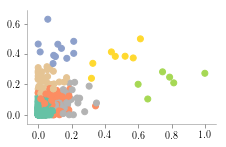

In [91]:
for i in range(len(best_show)):
    # for i in range(1):
        lr, iters, season, home, lam = best_show[i]
        print H_params[i]
        
        H_sandiego = H_sd[lr][iters][season][home][lam]
        H_austin = H_au[lr][season][home][lam][iters]
        
        H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
        H_sandiego = H_sandiego.values
        
        X = np.r_[H_austin, H_sandiego]
        print np.max(X)
        X = X/np.max(X)
        y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
        x1, x2 = (-np.var(X, axis=0)).argsort()[:2]
        
        y_sd = np.zeros(len(H_sandiego))
        y_au = np.ones(len(H_austin))
        y_label = np.r_[y_au, y_sd]
        
        home_error = H_error_home[lr][iters][season][home][lam]
        home_error = np.around(home_error.values) 
        
        app_error = np.around(H_error_app[lr][iters][season][home][lam].values)
        
        
        start = len(H_austin)
        d = np.random.randint(0, 2, size=(3,3,3))
        z,x,y = d.nonzero()
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(111)
    #     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
        ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2')
        
        hvac = app_error[:, 2]
        fridge = app_error[:, 1]
    #     dw = app_error[:, 5]
    
        max_hvac = (-hvac).argsort()[:5]
        max_fridge = (-fridge).argsort()[:5]
    #     max_dw = (-dw).argsort()[:5]
        
        #for i in max_hvac:
        #    ax.annotate(hvac[i], (X[i+start, x1],X[i+start, x2]))
        #for i in max_fridge:
        #    ax.annotate(fridge[i], (X[i+start, x1],X[i+start, x2]), color='red')
    #     for i in max_dw:
    #         ax.annotate(dw[i], (X[i+start, x1],X[i+start, x2]), color='blue')
            
    #     print \~/git/task3/demo_{}_{}_{}_{}_{}.png\.format(lr, iters, season, home, lam)
        format_axes(ax)
        plt.savefig("../figures/HF-appliance.pdf")